In [1]:
import numpy as np
import pandas as pd

In [3]:
t=pd.read_csv("/content/diabetes.csv")

In [4]:
t.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
t.shape

(768, 9)

In [8]:
t.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
correlation = t.corr()

In [13]:
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

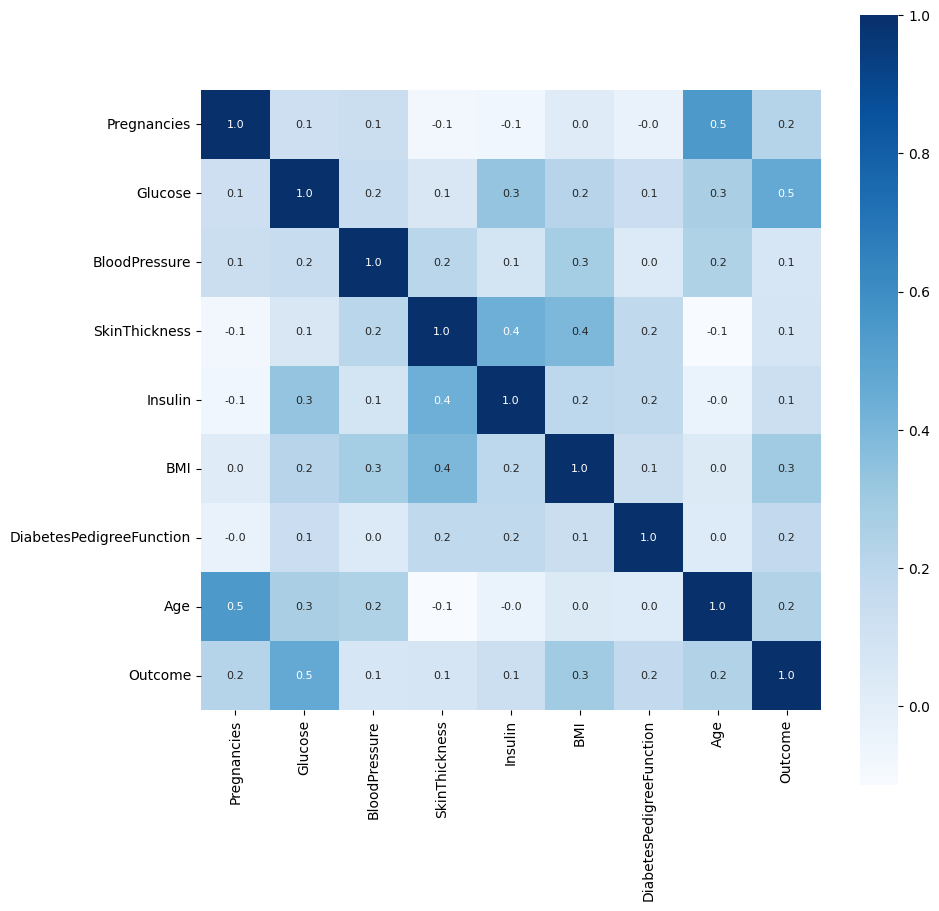

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = t.drop(['Outcome'], axis=1)
Y = t['Outcome']

In [19]:
knn = KNeighborsClassifier(n_neighbors=2)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [22]:
training_data_prediction = knn.predict(X_train)

In [23]:
print(training_data_prediction)

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 

In [25]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
score_1 = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ", score_1)
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
print('Mean Absolute Error : ', score_2)

R squared error :  0.3043193318295432
Mean Absolute Error :  0.15828677839851024


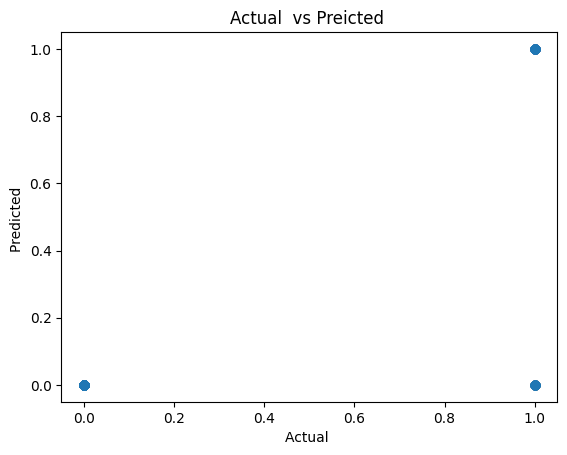

In [26]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title("Actual  vs Preicted ")
plt.show()